In [ ]:
#PART A

#Step: 1A
#Import and read ‘images.npy’.

#importing necessary libraries.

from platform import python_version
print(python_version())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow
print(tensorflow.__version__)
import tensorflow as tf
import os
import keras
import pickle
from zipfile import ZipFile
from PIL import Image

3.7.16
2.11.0


In [ ]:
#loading the images.npy file.

data = np.load('images.npy', allow_pickle = True)

In [ ]:
#Step: 1B
#Split the data into Features(X) & labels(Y). Unify shape of all the images.

X = data[:,0]
y = data[:,1]
print(X.shape, y.shape)

(409,) (409,)


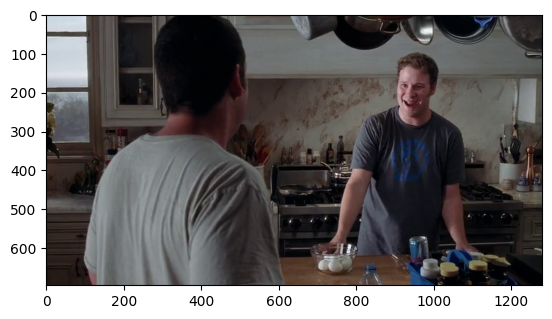

In [ ]:
plt.imshow(X[1])

In [ ]:
print(X[1].shape)

(697, 1280, 4)


In [ ]:
y[1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}],
  'imageWidth': 1280,
  'imageHeight': 697}]

In [ ]:
display(y[1])

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}],
  'imageWidth': 1280,
  'imageHeight': 697}]

In [ ]:
#Step: 1C
#Split the data into train and test.
#Step: 1D
#Select random image from the train data and display original image and masked image

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
ALPHA = 1

import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

In [ ]:
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [ ]:
X_train.shape


(409, 224, 224, 3)

In [ ]:
masks.shape


(409, 224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

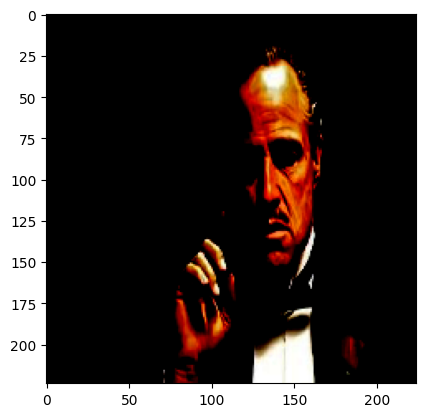

In [ ]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

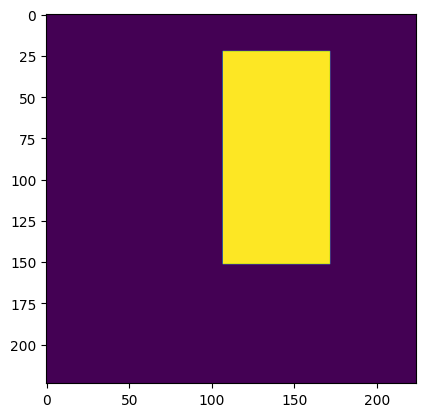

In [ ]:
pyplot.imshow(masks[n])

In [ ]:
#PART A:
#Step: 2A
#Design a face mask detection model.

# Hint: 1. Use MobileNet architecture for initial pre-trained non-trainable layers.
# Hint: 2. Add appropriate Upsampling layers to imitate U-net architecture.

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf

HEIGHT_CELLS = 28
WIDTH_CELLS = 28
BATCH_SIZE = 1

In [ ]:
model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
#importing the necessary libraries.

import keras
from tensorflow.keras.layers import Layer, Convolution2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses,optimizers
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D
from keras import backend


In [ ]:
#Desiging the model using MobileNet architecture.
#Also adding the upsampling layers.

def create_model(trainable=False):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block00 = model.layers[0].input
    block01 = model.get_layer("conv_pw_1_relu").output
    block02 = model.get_layer("conv_pw_2_relu").output
    block03 = model.get_layer("conv_pw_3_relu").output
    block05 = model.get_layer("conv_pw_5_relu").output
    block11 = model.get_layer("conv_pw_11_relu").output
    block13 = model.get_layer("conv_pw_13_relu").output

    decoderBlock = Concatenate()([UpSampling2D()(block13), block11])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block05])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block03])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block01])
    decoderBlock = Concatenate()([UpSampling2D()(decoderBlock), block00])

    decoderBlock = Conv2D(1, kernel_size=1, activation="sigmoid")(decoderBlock)
    decoderBlock = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(decoderBlock)

    return Model(inputs=model.input, outputs=decoderBlock)


In [ ]:
model = create_model()

In [ ]:
# Printing below the created model summary.

model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

In [ ]:
#Step: 2B
#Design your own Dice Coefficient and Loss function.

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [ ]:
#importing the necessary libraries.

from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())


In [ ]:
#Step: 2C
#Training and tuning the model as per required.

model = create_model(False)
model.summary()
#optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
model.compile(loss=loss, optimizer = 'adam', metrics=[dice_coefficient])


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv1[0][0]']                  
                                )                                                           

In [ ]:
#defining the calllbacks, modelcheckpoint, earlystopping & ReduceLROnPlateau functions.

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
callbacks = [ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,save_weights_only=True, mode="min", save_freq=1),
             EarlyStopping(monitor="loss", patience=5, mode="min"),
             ReduceLROnPlateau(monitor="loss", factor=0.2, patience=1, min_lr=1e-6, verbose=1, mode="min")]


In [ ]:
# Running & training the model with total number of epochs = 5.

history = model.fit(X_train,masks,epochs=5,verbose=1,batch_size=3,callbacks=callbacks)


Epoch 1/5

Epoch 1: loss improved from inf to 2.61564, saving model to model-2.62.h5
  1/137 [..............................] - ETA: 7:07 - loss: 2.6156 - dice_coefficient: 0.2271
Epoch 1: loss improved from 2.61564 to 2.41006, saving model to model-2.41.h5
  2/137 [..............................] - ETA: 3:11 - loss: 2.4101 - dice_coefficient: 0.2661
Epoch 1: loss improved from 2.41006 to 2.32622, saving model to model-2.33.h5
  3/137 [..............................] - ETA: 3:09 - loss: 2.3262 - dice_coefficient: 0.2448
Epoch 1: loss did not improve from 2.32622
  4/137 [..............................] - ETA: 2:55 - loss: 2.3386 - dice_coefficient: 0.2240
Epoch 1: loss improved from 2.32622 to 2.21217, saving model to model-2.21.h5
  5/137 [>.............................] - ETA: 2:53 - loss: 2.2122 - dice_coefficient: 0.2267
Epoch 1: loss improved from 2.21217 to 2.15762, saving model to model-2.16.h5
  6/137 [>.............................] - ETA: 2:49 - loss: 2.1576 - dice_coefficien

In [ ]:
#Step: 2D
#Evaluate and share insights on performance of the model.

#Observation: Here after running total 5 Epochs, we achieved the dice_coefficient of 63.89% which is a good achievement
# of dice_coefficient.

# and the loss reduced to 0.6802.



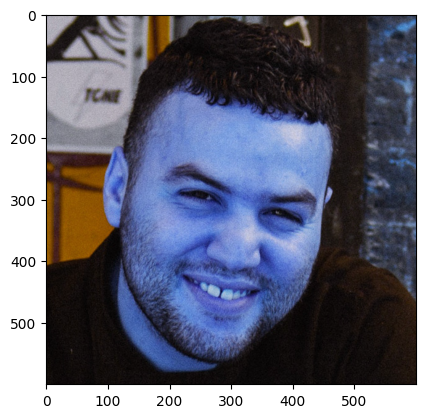

In [ ]:
#Step: 3
#Test the model predictions on the test image and visualise the predicted masks on the faces in the image.


test_image = cv2.imread('real_00004.jpg')
plt.imshow(test_image)


1/1 [==============================] - 0s 239ms/step


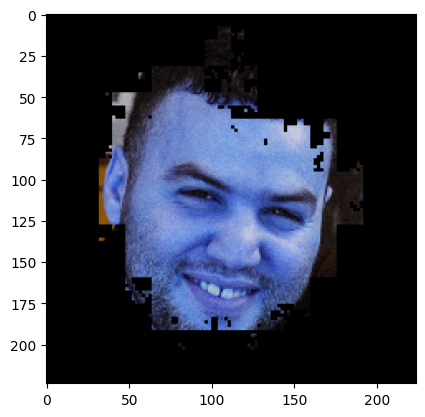

In [ ]:
#visualising the predicted masks on the face in the image.

sample_image = test_image
image = cv2.resize(sample_image, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > 0.2), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

plt.imshow(out_image)

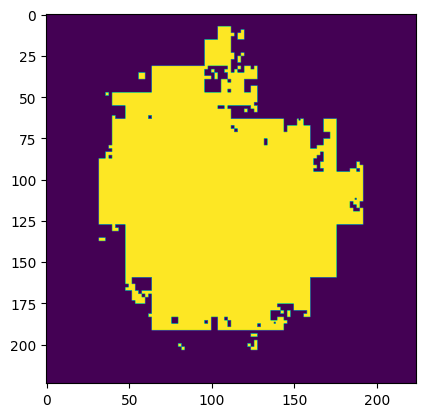

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(pred_mask, alpha=1)


In [ ]:
#PART B: 1
#Read/import images from folder ‘training_images’.

#importing the necessary libraries.
#unzipping the "training_images" folder.

import cv2
import os
import numpy as np
import zipfile


def unzipfile(file,destfolder):
    if (os.path.isdir(destfolder)==False):
      with zipfile.ZipFile(file,"r") as zip_ref:
        zip_ref.extractall(destfolder)


In [ ]:
# The image & supporting files are in the zip folder.
# so, we are extracting the zip files to further use these files.
# extracting the zip files

IS_LOCAL = True
if(IS_LOCAL):
    #full path
    PATH="C:/Users/amitr/OneDrive/Documents/AI&ML/February 2023/Computer Vision/Project/Project 2/CV Project 2 Files/trainingimages"
else:
    PATH="../input/"

files=os.listdir(PATH)


for f in files:
    if f.endswith('.zip'):
        filename=f.split('.')[0]
        unzipfile(PATH+'/'+f,PATH+'/'+filename)

print(os.listdir(PATH))

['training_images-20211126T092819Z-001 (1)', 'training_images-20211126T092819Z-001 (1).zip']


In [ ]:
#PART B: 2
# Write a loop which will iterate through all the images in the ‘training_images’ folder
#  and detect the faces present on all the images.

#using the "haarcascade_frontalface_default.xml" from internet to detect faces which is available open source.
#also using the "haarcascade_eye.xml" to detect eyes on the face images.

face_detector=cv2.CascadeClassifier('C:/Users/amitr/OneDrive/Documents/AI&ML/February 2023/Computer Vision/Project/Project 2/CV Project 2 Files/trainingimages/training_images-20211126T092819Z/haarcascade_frontalface_default.xml')
eye_detector=cv2.CascadeClassifier('C:/Users/amitr/OneDrive/Documents/AI&ML/February 2023/Computer Vision/Project/Project 2/CV Project 2 Files/trainingimages/training_images-20211126T092819Z/haarcascade_eye.xml')


In [ ]:
#the below code body will detect faces & eyes present on all the training images.

image_path = 'C:/Users/amitr/OneDrive/Documents/AI&ML/February 2023/Computer Vision/Project/Project 2/CV Project 2 Files/trainingimages/training_images-20211126T092819Z/training_images/'
image_list = os.listdir(image_path)
for image in image_list:
    img = cv2.imread(image_path + image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_detector.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            cv2.imshow('img',img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()


In [ ]:
#PART: 3
#From the same loop above, extract metadata of the faces and write into a DataFrame.
from PIL import Image
from PIL.ExifTags import TAGS

In [ ]:
image_path = 'C:/Users/amitr/OneDrive/Documents/AI&ML/February 2023/Computer Vision/Project/Project 2/CV Project 2 Files/train/Images/'

In [ ]:
image = Image.open(image_path)

In [ ]:
#PART C
#Step: 1

#Unzip, read and Load data(‘PINS.zip’) into session.

#importing the necessary libraries.
#unzipping the "PINS.zip" folder.

import cv2
import os
import numpy as np
import zipfile


def unzipfile(file,destfolder):
    if (os.path.isdir(destfolder)==False):
      with zipfile.ZipFile(file,"r") as zip_ref:
        zip_ref.extractall(destfolder)


IS_LOCAL = True
if(IS_LOCAL):
    #full path
    PATH="C:/Users/amitr/OneDrive/Documents/AI&ML/February 2023/Computer Vision/Project/Project 2/CV Project 2 Files/"
else:
    PATH="../input/"

files=os.listdir(PATH)


for f in files:
    if f.endswith('.zip'):
        filename=f.split('.')[0]
        unzipfile(PATH+'/'+f,PATH+'/'+filename)


In [ ]:
#Step: 2
#Write function to create metadata of the image.

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

In [ ]:
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

In [ ]:
metadata = load_metadata('C:/Users/amitr/OneDrive/Documents/AI&ML/February 2023/Computer Vision/Project/Project 2/CV Project 2 Files/PINS/PINS')

In [ ]:
#Step: 3
#Write a loop to iterate through each and every image and create metadata for all the images

import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]


In [ ]:
load_image('C:/Users/amitr/OneDrive/Documents/AI&ML/February 2023/Computer Vision/Project/Project 2/CV Project 2 Files/PINS/PINS/pins_Aaron Paul/Aaron Paul101_247.jpg')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
#Step: 4
#Generate Embeddings vectors on the each face in the dataset.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

In [ ]:
def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [ ]:
model = vgg_face()

In [ ]:
model.load_weights('C:/Users/amitr/OneDrive/Documents/AI&ML/February 2023/Computer Vision/Project/Project 2/CV Project 2 Files/vgg_face_weights.h5')

In [ ]:
model.layers[0], model.layers[-2]

(<keras.layers.reshaping.zero_padding2d.ZeroPadding2D at 0x165c6052908>,
 <keras.layers.reshaping.flatten.Flatten at 0x165c882e0c8>)

In [ ]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
type(vgg_face_descriptor)

keras.engine.functional.Functional

In [ ]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

In [ ]:
img_path = metadata[0].image_path()
img = load_image(img_path)

In [ ]:
img = (img / 255.).astype(np.float32)
img = cv2.resize(img, dsize = (224,224))
print(img.shape)

(224, 224, 3)


In [ ]:
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

1/1 [==============================] - 1s 708ms/step
(2622,)


In [ ]:
embedding_vector[0], type(embedding_vector), type(embedding_vector[0])

(0.031703044, numpy.ndarray, numpy.float32)

In [ ]:
embedding_vector[2], embedding_vector[98], embedding_vector[-2]

(-0.012434018, -0.008693828, 0.0021908146)

In [ ]:
total_images = len(metadata)

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

1/1 [==============================] - 0s 176ms/step


In [ ]:
print('embeddings shape :', embeddings.shape)

embeddings shape : (8238, 2622)


In [ ]:
embeddings[0], embeddings[988], embeddings[988].shape


(array([ 0.03170304, -0.0150513 , -0.01243402, ...,  0.00043139,
         0.00219081, -0.00908097]),
 array([ 0.01304461,  0.01121107,  0.01243887, ..., -0.005799  ,
         0.00464785,  0.02441356]),
 (2622,))

In [ ]:
embeddings[8237]

array([ 0.01948042, -0.00239453, -0.0146773 , ...,  0.00457997,
       -0.00867101,  0.00775804])

In [ ]:
#Step: 5
#Build distance metrics for identifying the distance between two similar and dissimilar images.

def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

In [ ]:
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));

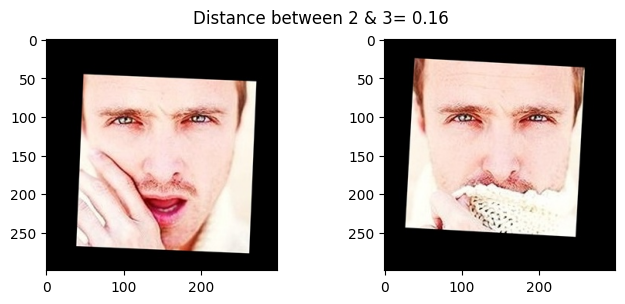

In [ ]:
show_pair(2, 3)

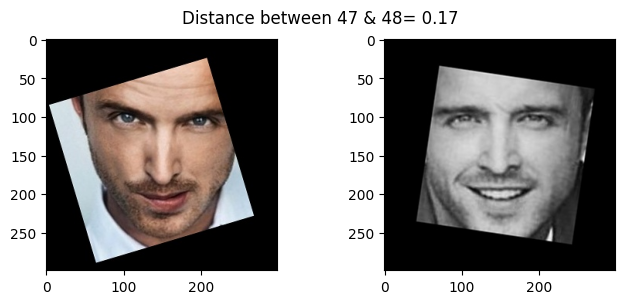

In [ ]:
show_pair(47, 48)

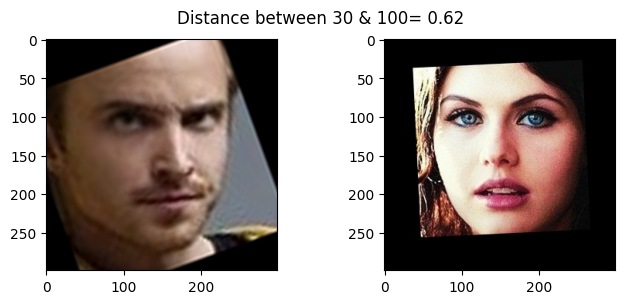

In [ ]:
show_pair(30, 100)


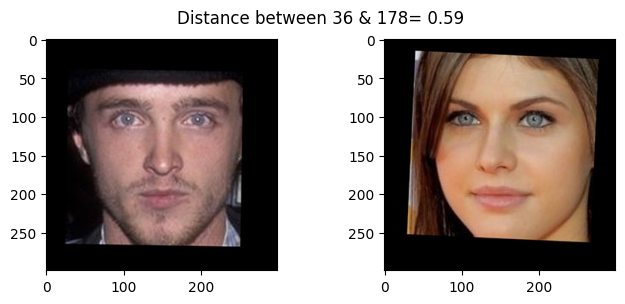

In [ ]:
show_pair(36, 178)

In [ ]:
#Observation: We can observe from above that the distance between the pair 36 and 178 is 0.59.

In [ ]:
#Step: 6
# Use PCA for dimensionality reduction.

train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

In [ ]:
X_train = embeddings[train_idx]

In [ ]:
X_test = embeddings[test_idx]
targets = np.array([m.name for m in metadata])

In [ ]:
y_train = targets[train_idx]

In [ ]:
y_test = targets[test_idx]

In [ ]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (7322,2622)
y_train shape : (7322,)
X_test shape : (916,2622)
y_test shape : (916,)


In [ ]:
y_test[0], y_train[72]

('pins_Aaron Paul', 'pins_Aaron Paul')

In [ ]:
len(np.unique(y_test)), len(np.unique(y_train))

(77, 77)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [ ]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amaury Nolasco'
 'pins_Anna Gunn' 'pins_Benedict Cumberbatch' 'pins_Betsy Brandt'
 'pins_Brit Marling' 'pins_Bryan Cranston' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Pratt' 'pins_Cobie Smulders'
 'pins_Danielle Panabaker' 'pins_Dave Franco' 'pins_Dominic Purcell'
 'pins_Emilia Clarke' 'pins_Emily Bett Rickards' 'pins_Emma Stone'
 'pins_Gwyneth Paltrow' 'pins_Henry Cavil' 'pins_Jason Momoa'
 'pins_Jeremy Renner' 'pins_Jesse Eisenberg' 'pins_Jim Parsons'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Mark Ruffalo' 'pins_Martin Starr'
 'pins_Melissa benoit' 'pins_Mike Colter' 'pins_Morena Baccarin'
 'pins_Morgan Freeman' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_Rami Melek' 'pins_Robert Knepper'
 'pins_Robin Taylor' 'pins_Sarah Wayne Callies' 'pins_Scarlett Johansson'
 'pins_Sebastian Stan' 'pins_Sophie Turner' 'pins_Sundar Pichai'
 'pins_Tom Cavanagh' 'pins

In [ ]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [ 0  0  0 ... 49 49 49]
y_test_encoded :  [ 0  0  0  0  0  0  0  0  0  0 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2
  2  2  2 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51  3  3  3  3
  3  3  3 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 53 53 53 53 53
 53 53 53 53 53  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5 54 54 54
 54 54 54 54 54 54 54 55 55 55 55 55 55 55 55 55 55 55 55 55 55  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  8  8  8 56 56 56 56 56 56 56 56 56 56 56 56 56  9  9  9
  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12
 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 57 57 57 57 57 57 57 57
 57 57 57 14 14 14 14 14 14 14 14 14 14 14 14 58 58 58 58 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 60 60 60 60 60 60 60 60 60 60

In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [ ]:
X_test_std = scaler.transform(X_test)

In [ ]:
print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (7322,2622)
y_train_encoded shape : (7322,)
X_test_std shape : (916,2622)
y_test_encoded shape : (916,)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [ ]:
X_train_pca.shape

(7322, 128)

In [ ]:
X_test_pca.shape

(916, 128)

In [ ]:
#Step: 7
#Build an SVM classifier in order to map each image to its right person.

#importing the necessary library.

from sklearn.svm import SVC


In [ ]:

clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [ ]:

y_predict = clf.predict(X_test_pca)

In [ ]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [ 0  0  0  0  0  0  0  0  0  0 50 50 50 48 50 50 50 50 50 50 50 50 50 50
 50 50 60 50  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2
  2  2  2 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51  3  3  3  3
  3  3  3 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 52 53 53 53 22 53
 53 53 53 53 53  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5 54 54 54
 54 54 54 54 54 54 54 55 55 55 55 55 55 55 55 55 55 55 55 55 55  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7 15  7  7  8  8  8  8
  8  8  8  8  8  8  8  8 56 56 56 56 56 56 56 56 56 56 56 56 56  9  9  9
  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10  4 10 10 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 60 12
 12 12 13 13 13 13 13 13 13 13 13 13 13 13 13 13 57 57 57 57 57 57 57 57
 57 57 57 14 14 14 14 14 14 14 14 14 14 14 14 58  6 58 58 59 59 59 59 59
 59 59 59 59 59 59 59 59 59 59 59 60 60 60 60 60 60 60 60 60 60 60 61 61
 61 61 61 61 61 61 61 61 15 15 15 15 1

In [ ]:
y_predict_encoded = le.inverse_transform(y_predict)

In [ ]:
print('y_predict shape : ', y_predict.shape)
print('y_test_encoded shape : ', y_test_encoded.shape)

y_predict shape :  (916,)
y_test_encoded shape :  (916,)


In [ ]:
y_test_encoded[32:49]

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Step: 8
#Import and display the the test images
#Step: 9
#Use the trained SVM model to predict the face on test images.

from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score
accuracy_score(y_test_encoded, y_predict)

0.9694323144104804

In [ ]:
#Observation: Here, above we got the accuracy score coming out of the trained model is 96.94%.


In [ ]:
example_idx = 356


In [ ]:
example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity =  y_predict_encoded[example_idx]


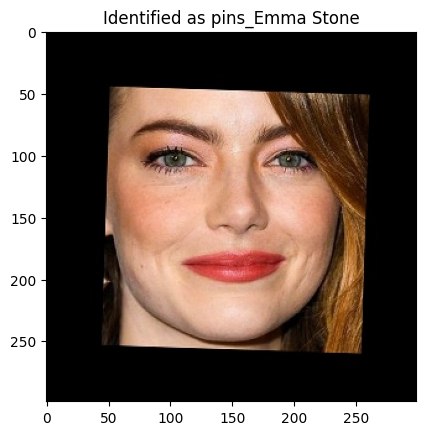

In [ ]:
plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

In [ ]:
#Observation: Here, above with the SVM model the above test image is predicted as "pins_Emma_Stone".

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content
